In [614]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve,ConfusionMatrixDisplay,silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans , DBSCAN
from itertools import combinations
from sklearn.decomposition import PCA

In [615]:
df = pd.read_csv('segmentation data.csv')

In [616]:
df.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
917,100000918,0,0,68,2,287247,2,2
854,100000855,0,0,45,1,200298,1,1
296,100000297,1,1,20,1,127928,1,2
896,100000897,1,1,28,1,144448,2,1
693,100000694,0,0,44,1,110374,0,0


In [617]:
df.drop('ID' , axis=1 , inplace=True )

In [618]:
for col in df.columns:
    print( col , ' ' , df[col].unique())

Sex   [0 1]
Marital status   [0 1]
Age   [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59 73 72 76 71 18]
Education   [2 1 0 3]
Income   [124670 150773  89210 ...  86400  97968  68416]
Occupation   [1 0 2]
Settlement size   [2 0 1]


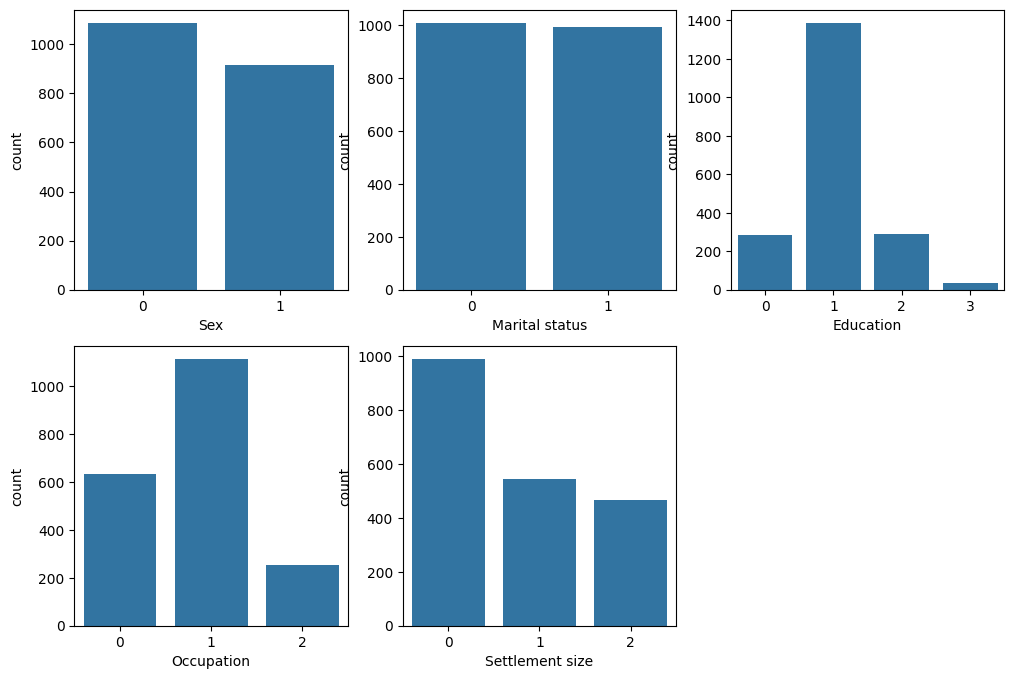

In [619]:
cols = ['Sex' , 'Marital status' , 'Education' , 'Occupation' , 'Settlement size' ]
plt.figure(figsize=(12,8))
for i,col in enumerate(cols,1):
    plt.subplot(2,3,i)
    sns.countplot(x=df[col])
plt.show()

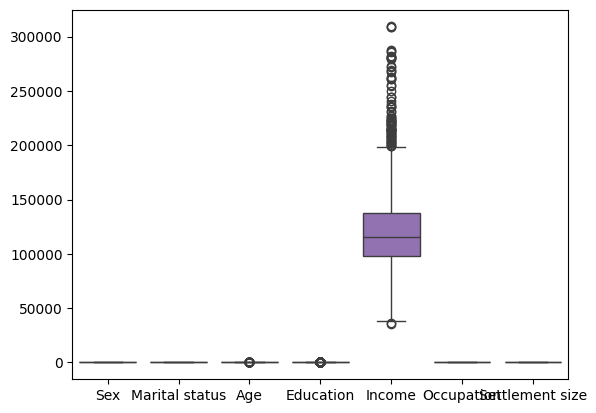

In [620]:
sns.boxplot(df)
plt.show()

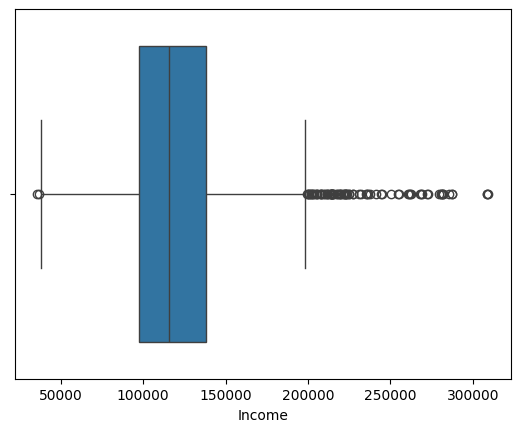

In [621]:
sns.boxplot(x=df['Income'])
plt.show()

In [622]:
# df = df[df['Income'] < 200000]

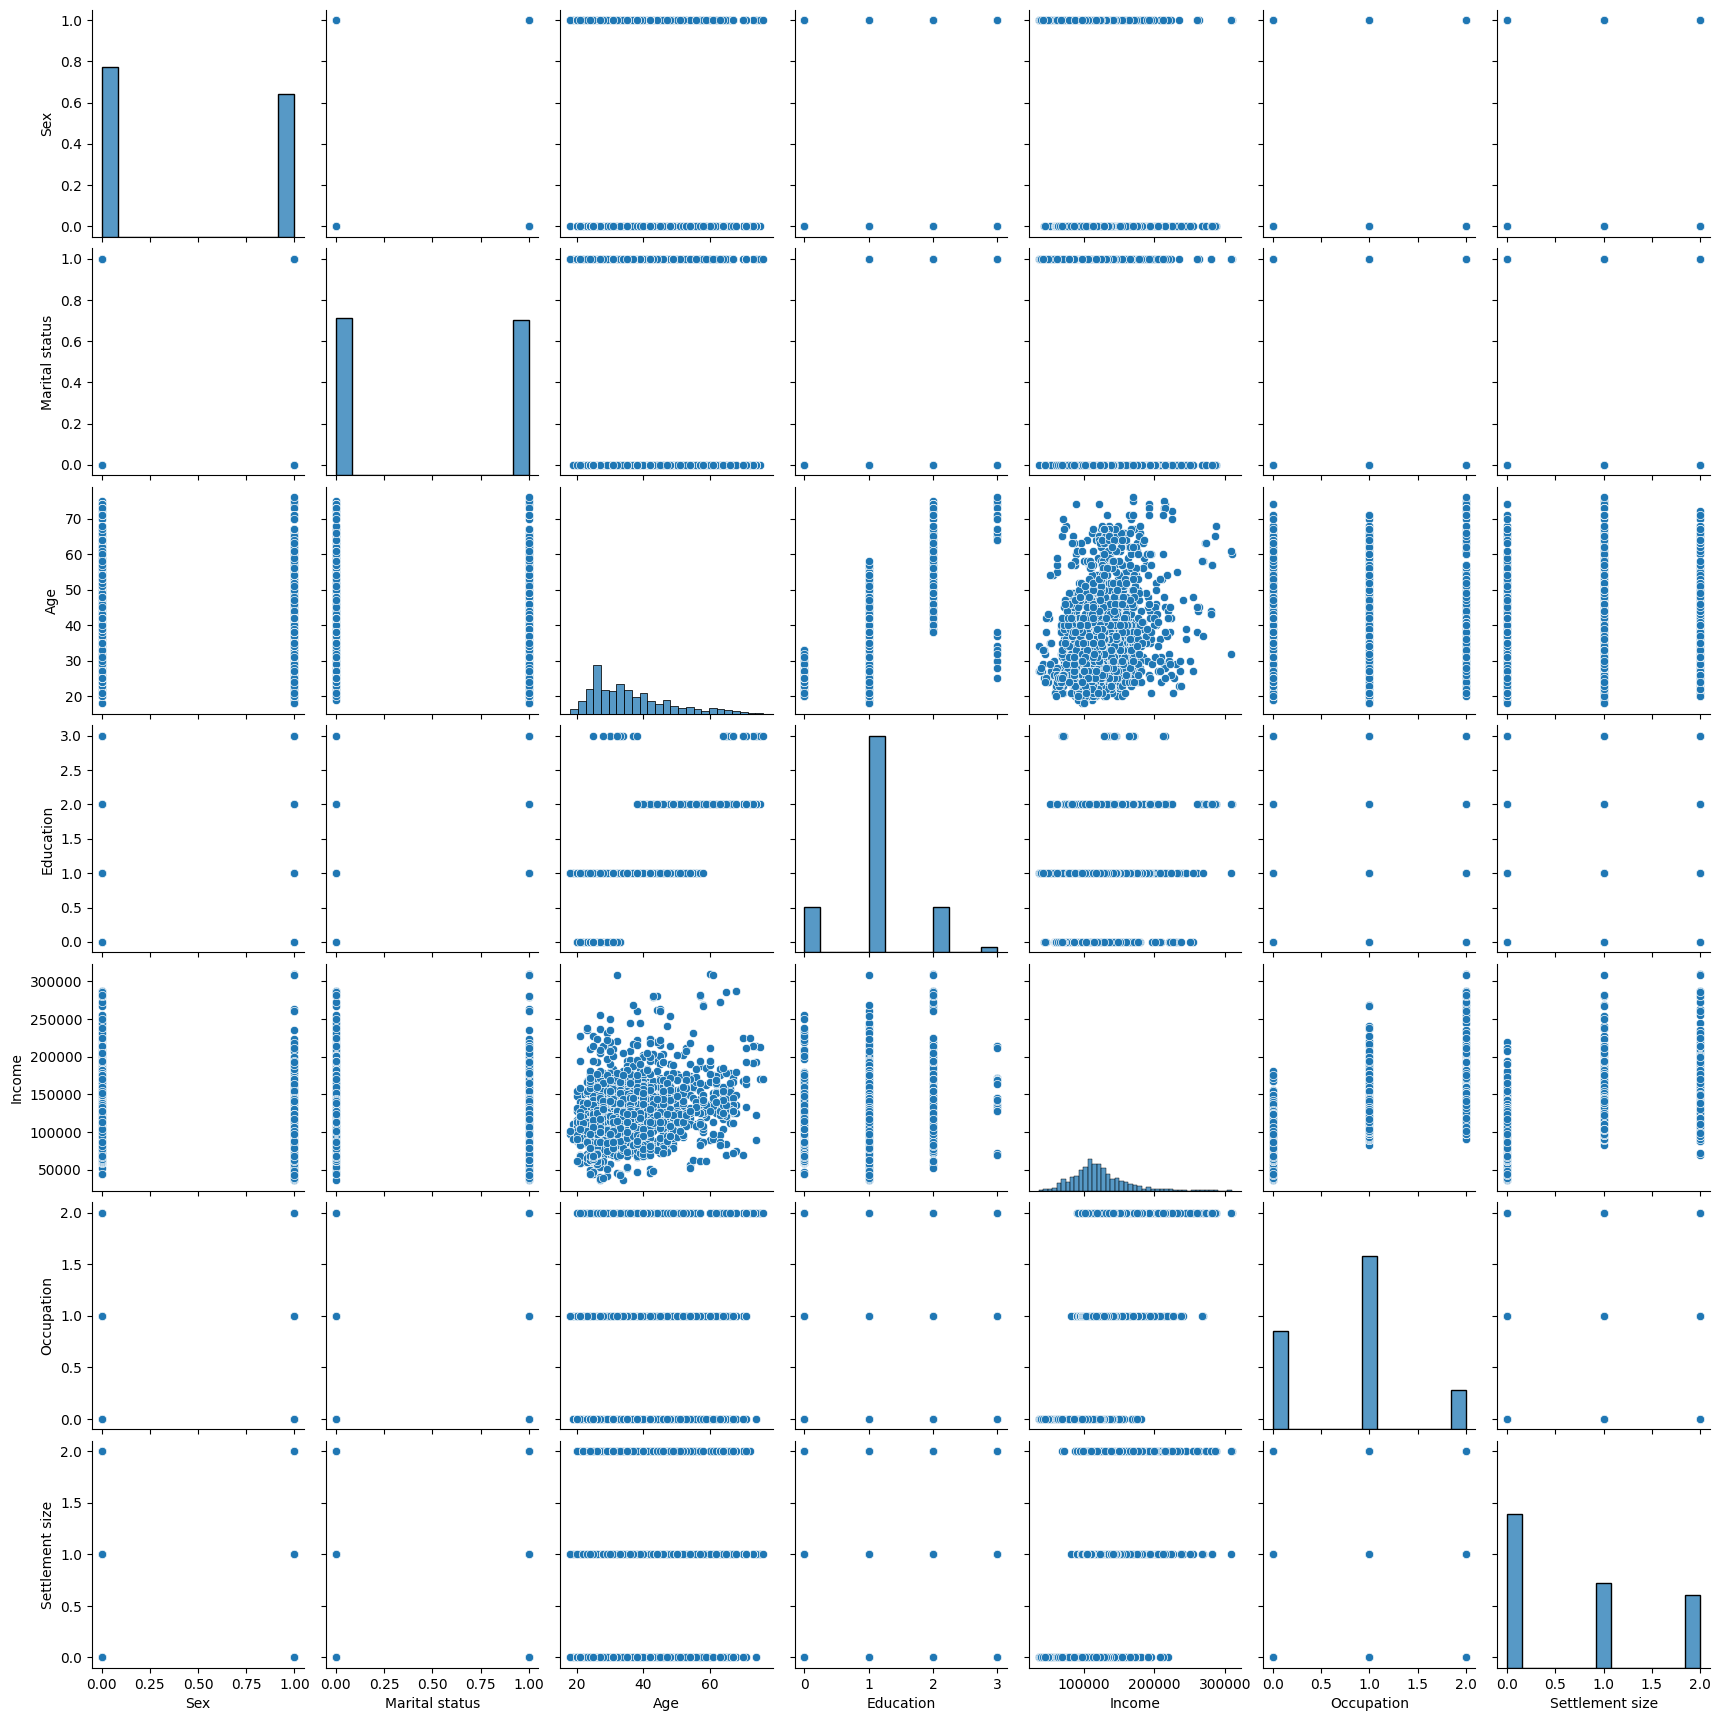

In [623]:
sns.pairplot(df)
plt.show()

In [624]:
df.var()

Sex                2.482751e-01
Marital status     2.501128e-01
Age                1.373444e+02
Education          3.597359e-01
Income             1.452283e+09
Occupation         4.077936e-01
Settlement size    6.602091e-01
dtype: float64

In [625]:
st = StandardScaler()
for col in df.columns:
    df[col] = st.fit_transform(df[[col]])

In [626]:
df.sample(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
327,1.090038,1.007025,-0.162933,-0.063372,0.745462,0.296823,1.552326
1337,1.090038,-0.993024,-0.931082,-0.063372,-0.727610,-1.269525,-0.909730
1621,-0.917399,1.007025,-0.760382,-0.063372,-1.412583,-1.269525,-0.909730
952,1.090038,1.007025,-0.675033,-0.063372,1.153842,0.296823,-0.909730
1707,1.090038,1.007025,-0.248283,-0.063372,-2.024957,-1.269525,-0.909730


In [627]:
df.var()

Sex                1.0005
Marital status     1.0005
Age                1.0005
Education          1.0005
Income             1.0005
Occupation         1.0005
Settlement size    1.0005
dtype: float64

## Fit On All Data

In [628]:
elbow = []
score = []
num = range(2,12)
for i in num:
    km = KMeans(n_clusters=i , random_state=42)
    y_pred = km.fit_predict(df)
    elbow.append(km.inertia_)
    score.append(silhouette_score(df,y_pred))

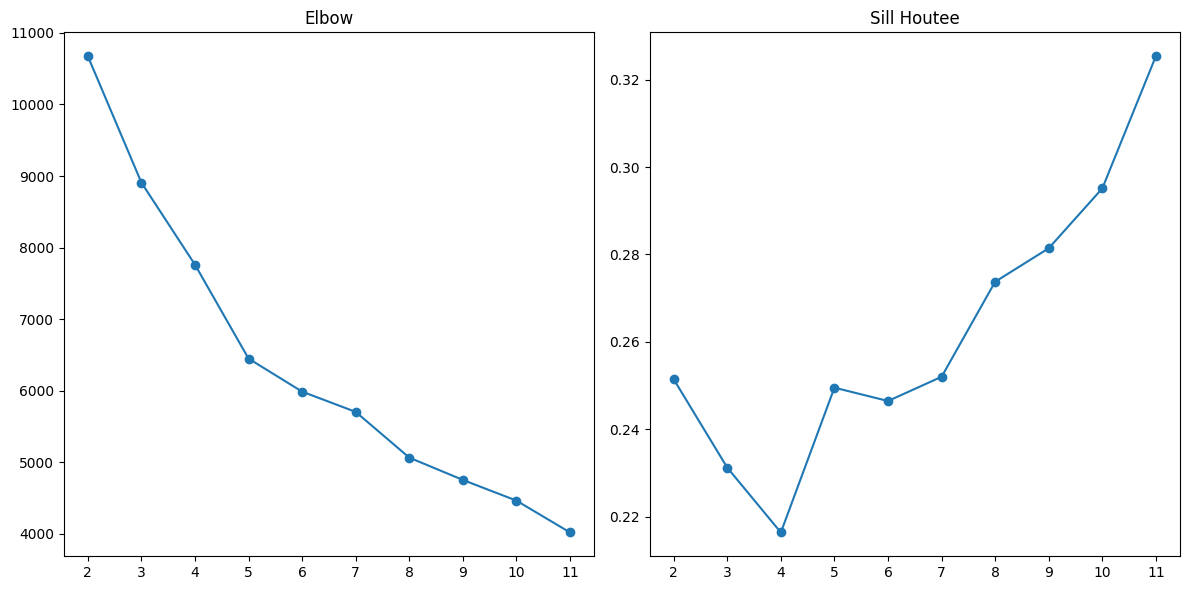

In [629]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(num , elbow , marker = 'o')
plt.title("Elbow")
plt.xticks(num)
plt.subplot(1,2,2)
plt.plot(num , score , marker = 'o')
plt.title("Sill Houtee")
plt.tight_layout()
plt.xticks(num)
plt.show()

## Fit On Age - Income

In [630]:
elbow = []
score = []
num = range(2,12)
for i in num:
    km = KMeans(n_clusters=i , random_state=42)
    y_pred = km.fit_predict(df[['Age' , 'Income']])
    elbow.append(km.inertia_)
    score.append(silhouette_score(df[['Age' , 'Income']],y_pred))

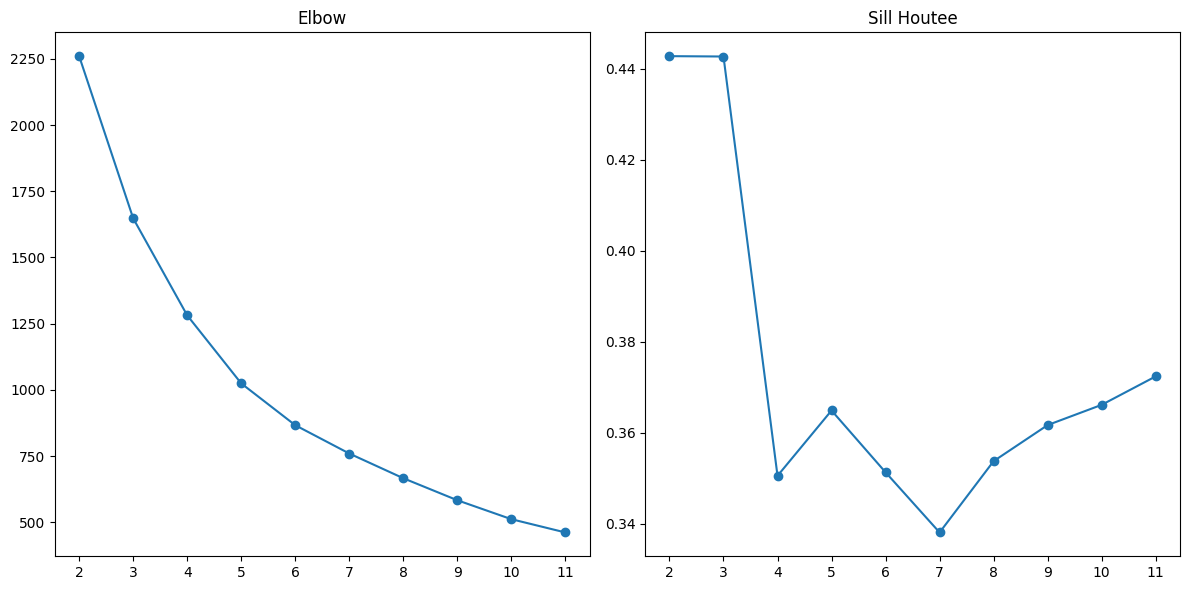

In [631]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(num , elbow , marker = 'o')
plt.title("Elbow")
plt.xticks(num)
plt.subplot(1,2,2)
plt.plot(num , score , marker = 'o')
plt.title("Sill Houtee")
plt.tight_layout()
plt.xticks(num)
plt.show()

## test on every 2 columns in data

In [632]:
feature_pairs = list(combinations(df.columns, 2))
pd.DataFrame(feature_pairs)

,0,1
0,Sex,Marital status
1,Sex,Age
2,Sex,Education
3,Sex,Income
4,Sex,Occupation
5,Sex,Settlement size
6,Marital status,Age
7,Marital status,Education
8,Marital status,Income
9,Marital status,Occupation


In [633]:
# score = -10
# num = -1
# col1 , col2 = "",""
# for f1 , f2 in feature_pairs:
#     for i in range(2,11):
#         km = KMeans(n_clusters=i,random_state=42)
#         y_pred = km.fit_predict(df[[f1 , f2]])
#         temp = silhouette_score(df[[f1 , f2]] , y_pred)
#         if temp >= score:
#             score = temp
#             num = i
#             col1 = f1
#             col2 = f2

In [634]:
# print("Best Two Colums Is:" , col1 , "," , col2 , " With Score:" , score , " And n:" , num)

## DBscan Testing in same features

In [635]:
db = DBSCAN()
y_pred = db.fit_predict(df[['Sex' , 'Marital status']])
silhouette_score(df[['Sex' , 'Marital status']] , y_pred)

np.float64(1.0)

## Try cat - num Data only

In [636]:
df = pd.read_csv('segmentation data.csv')

In [637]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [638]:
df.drop('ID' ,axis=1 , inplace=True)

In [639]:
num_cols = ['Age' , 'Income']
cat_cols = ['Sex' , 'Marital status' , 'Education' , 'Occupation' , 'Settlement size']

In [640]:
elbow = []
score = []
num = range(2,12)
for i in num:
    km = KMeans(n_clusters=i , random_state=42)
    y_pred = km.fit_predict(df[num_cols])
    elbow.append(km.inertia_)
    score.append(silhouette_score(df[num_cols],y_pred))

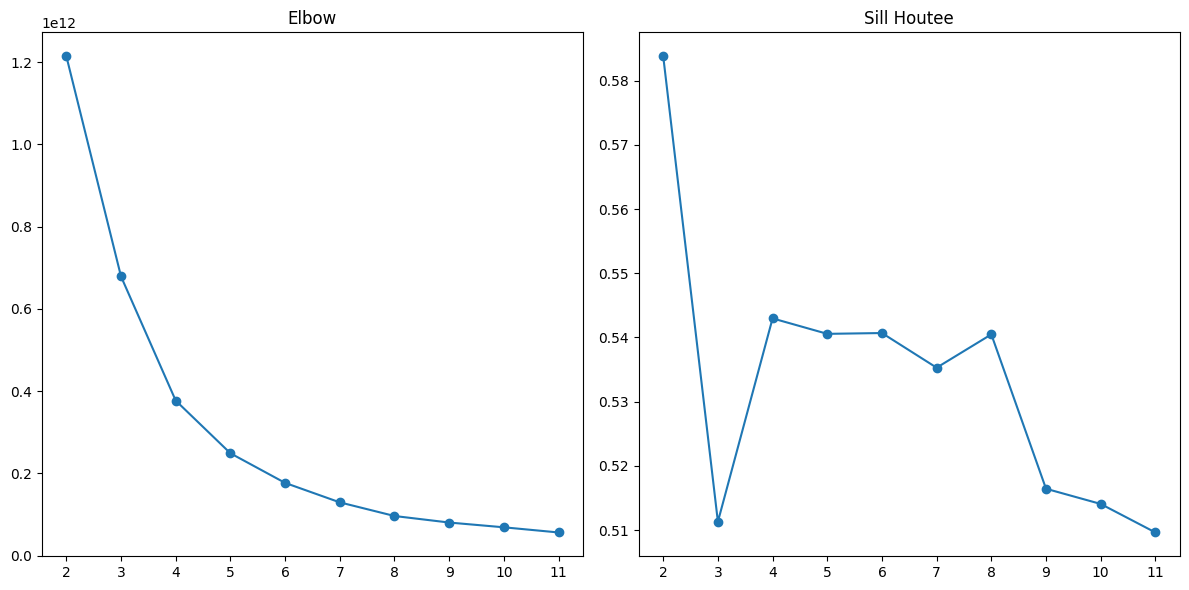

In [641]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(num , elbow , marker = 'o')
plt.title("Elbow")
plt.xticks(num)
plt.subplot(1,2,2)
plt.plot(num , score , marker = 'o')
plt.title("Sill Houtee")
plt.tight_layout()
plt.xticks(num)
plt.show()

In [642]:
km = KMeans(random_state=42,n_clusters=2)
y_pred = km.fit_predict(df[num_cols])
silhouette_score(df[num_cols], y_pred)

np.float64(0.5838070768474933)

In [643]:
df['cluster'] = y_pred

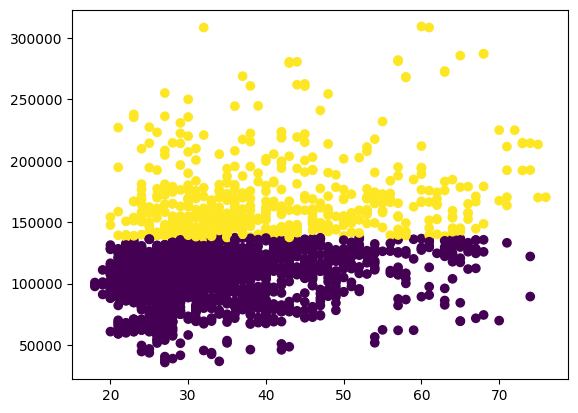

In [644]:
plt.scatter(df['Age'] , df['Income'] , c = y_pred)
plt.show()

In [645]:
db = DBSCAN()
y_pred = db.fit_predict(df[num_cols])

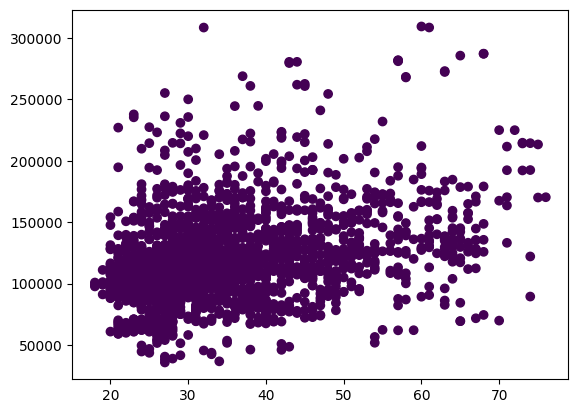

In [646]:
plt.scatter(df['Age'] , df['Income'] , c = y_pred)
plt.show()

## ChatGpt

In [647]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans, DBSCAN
# from sklearn.metrics import silhouette_score, davies_bouldin_score

# df = pd.read_csv('segmentation data.csv')
# # -----------------------
# # 1. Preprocessing
# # -----------------------
# df = df.drop(columns=['ID'])  # drop ID column

# # Separate numeric and categorical
# num_cols = ['Age', 'Income']
# cat_cols = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

# # Encode categorical (لو كلها أرقام جاهزة ممكن نسيبها زي ما هي)
# X = df[num_cols + cat_cols]

# # Scale numeric features
# scaler = StandardScaler()
# X[num_cols] = scaler.fit_transform(X[num_cols])

# # -----------------------
# # 2. PCA
# # -----------------------
# pca = PCA(n_components=2)   # نجرب 2D visualization
# X_pca = pca.fit_transform(X)

# # -----------------------
# # 3. Clustering
# # -----------------------
# # KMeans
# best_score = -1
# best_k = None
# for k in range(2, 10):
#     km = KMeans(n_clusters=k, random_state=42)
#     y_pred = km.fit_predict(X_pca)
#     score = silhouette_score(X_pca, y_pred)
#     print(f"KMeans k={k} silhouette={score:.3f}")
#     if score > best_score:
#         best_score = score
#         best_k = k

# print(f"\nBest KMeans: k={best_k}, silhouette={best_score:.3f}")

# # DBSCAN
# db = DBSCAN(eps=0.5, min_samples=5)
# y_db = db.fit_predict(X_pca)
# if len(set(y_db)) > 1:  # لازم يبقى في اكتر من كلستر
#     print("DBSCAN silhouette:", silhouette_score(X_pca, y_db))
# else:
#     print("DBSCAN: كل النقاط بقت noise أو cluster واحد")

# # -----------------------
# # 4. Evaluation Extra
# # -----------------------
# km_best = KMeans(n_clusters=best_k, random_state=42).fit(X_pca)
# y_best = km_best.labels_
# db_score = davies_bouldin_score(X_pca, y_best)
# print("Davies-Bouldin score:", db_score)


In [648]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

# # 1) Preprocessing
# num_cols = df.select_dtypes(include=['int64','float64']).columns
# cat_cols = df.select_dtypes(include=['object']).columns

# preprocessor = ColumnTransformer([
#     ("num", StandardScaler(), num_cols),
#     ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
# ])

# # 2) PCA + KMeans Pipeline
# pipeline = Pipeline([
#     ("preprocess", preprocessor),
#     ("pca", PCA(n_components=2)),   # عشان نقدر نرسم 2D
#     ("kmeans", KMeans(n_clusters=3, random_state=42))
# ])

# # Fit pipeline
# pipeline.fit(df)

# # 3) Transform data for visualization
# X_pca = pipeline.named_steps["pca"].transform(
#     pipeline.named_steps["preprocess"].transform(df)
# )

# labels = pipeline.named_steps["kmeans"].labels_

# # 4) Visualization
# plt.figure(figsize=(8,6))
# sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="viridis", s=60)
# plt.title("Clusters Visualization after PCA", fontsize=14)
# plt.xlabel("PCA 1")
# plt.ylabel("PCA 2")
# plt.legend(title="Cluster")
# plt.show()


In [ ]:
# Explore Data
# check null => fill null
# check outliers
# encode object Data
# visulize data
# if colums >= 15 then PCA On all df
# Try fit on df , elbow method , sillhoutte score => to find best n
# then PCA for Visualize
# or
# Do feature combination and test all 2 features
# Visulaze clusters

